In [3]:
from PIL import Image
import os
Image.MAX_IMAGE_PIXELS = None
import numpy as np  
import pandas as pd

/tmp/ipykernel_1313988/3192904594.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
registered_image=np.array(Image.open('/fs5/p_masi/rudravg/MxIF_Vxm_Registered_V2/GCA022ACB_TISSUE03/AF_Removed/ROUND_12_CY3_GCA022ACB_TISSUE03_OLFM4_normalized_corrected.tif'))
unregistered_image=np.array(Image.open('/fs5/p_masi/rudravg/MxIF_Vxm_Registered_V2/GCA022ACB_TISSUE03/Unregistered/AF_Removed/ROUND_12_CY3_GCA022ACB_TISSUE03_OLFM4_normalized_corrected.tif'))

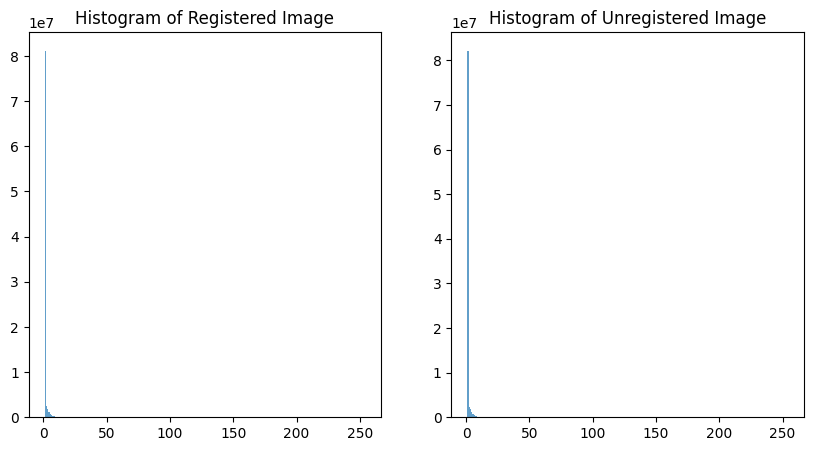

In [11]:
import matplotlib.pyplot as plt

# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram of the registered image
axs[0].hist(registered_image[registered_image > 0].ravel(), bins=256, alpha=0.7)
axs[0].set_title('Histogram of Registered Image')

# Plot the histogram of the unregistered image
axs[1].hist(unregistered_image[unregistered_image > 0].ravel(), bins=256, alpha=0.7)
axs[1].set_title('Histogram of Unregistered Image')

# Show the plot
plt.show()


In [49]:
mean_intensities_registered=pd.read_csv('/fs5/p_masi/rudravg/MxIF_Vxm_Registered_V2/GCA022ACB_TISSUE03/registered_GCA022ACB_T3_instances.csv')
mean_intensities_unregistered=pd.read_csv('/fs5/p_masi/rudravg/MxIF_Vxm_Registered_V2/GCA022ACB_TISSUE03/unregistered_GCA022ACB_T3_instances.csv')

In [50]:
mean_intensities_registered.head()

,Instance,Centroid_X,Centroid_Y,Mean_CD11B,Mean_CD20,Mean_CD3d,Mean_CD45,Mean_CD4,Mean_CD68,Mean_CD8,Mean_CgA,Mean_Lysozyme,Mean_NaKATPase,Mean_PanCK,Mean_SMA,Mean_Sox9,Mean_Vimentin,Mean_OLFM4,slide_id
0,1,411.837782,125.603696,0.254620,0.110883,0.825462,48.683778,0.002053,0.244353,0.287474,0.049281,0.227926,0.000000,0.024641,0.098563,0.694045,0.706366,0.244353,registered
1,2,428.330935,135.187050,0.298561,0.517986,0.392086,109.634892,0.010791,0.176259,0.850719,0.012590,0.107914,0.010791,0.280576,0.000000,1.395683,0.271583,0.476619,registered
2,3,4827.311298,147.763221,0.000000,0.056490,0.000000,0.000000,0.018029,0.109375,0.018029,0.195913,0.004808,0.294471,8.137019,5.526442,4.257212,0.000000,0.062500,registered
3,4,393.721843,148.488055,0.443686,0.095563,4.298635,111.967577,4.302048,1.372014,0.081911,0.648464,0.192833,0.025597,0.003413,0.008532,2.058020,1.059727,0.146758,registered
4,5,434.630000,152.216667,0.036667,1.793333,5.393333,53.403333,0.506667,0.076667,4.480000,0.996667,1.453333,0.040000,1.756667,0.656667,3.573333,0.023333,2.890000,registered


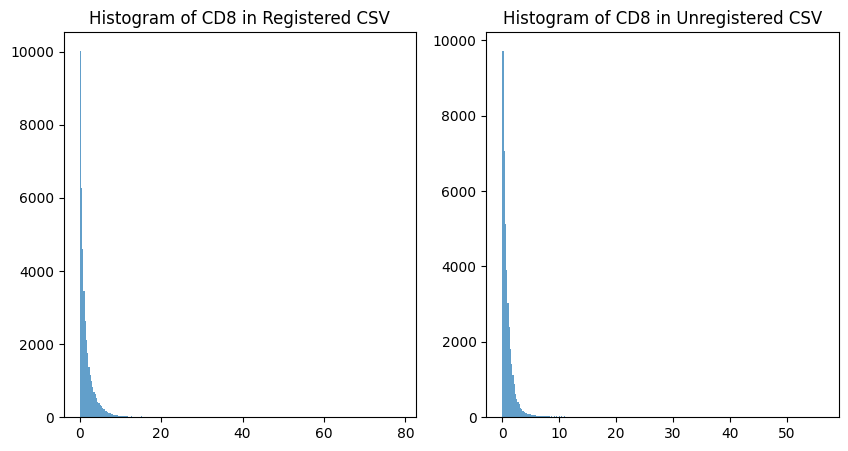

In [51]:
#Plot the histograms of CD8 column in registered and unregistred csvs side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(mean_intensities_registered['Mean_CD8'].values, bins=256, alpha=0.7)
axs[0].set_title('Histogram of CD8 in Registered CSV')
axs[1].hist(mean_intensities_unregistered['Mean_CD8'].values, bins=256, alpha=0.7)
axs[1].set_title('Histogram of CD8 in Unregistered CSV')
plt.show()

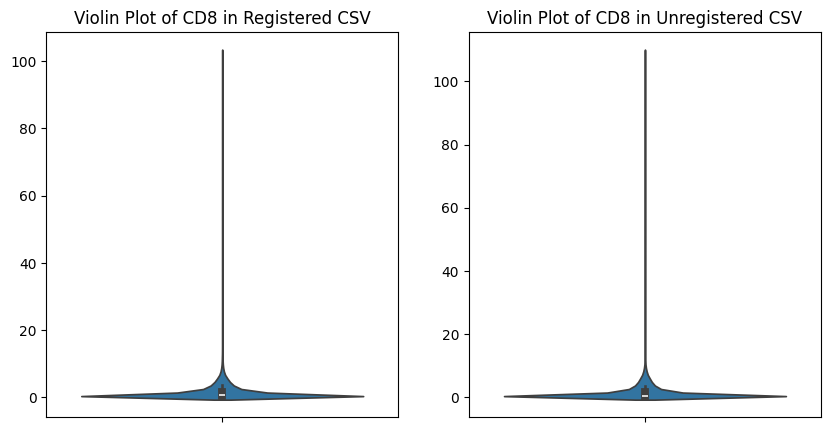

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the violin plot of the 'Mean_CD8' column in the registered CSV
sns.violinplot(ax=axs[0], y=mean_intensities_registered['Mean_CgA'].values)
axs[0].set_title('Violin Plot of CD8 in Registered CSV')

# Plot the violin plot of the 'Mean_CD8' column in the unregistered CSV
sns.violinplot(ax=axs[1], y=mean_intensities_unregistered['Mean_CgA'].values)
axs[1].set_title('Violin Plot of CD8 in Unregistered CSV')

# Show the plot
plt.show()

In [77]:
#Count how many values in the Mean_CD11B are greater than 40
count = (mean_intensities_unregistered['Mean_CD8'] >= 72).sum()
count

0